In [26]:
from sklearn.datasets import load_iris
import pandas as pd 
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import graphviz


In [3]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns=[iris.feature_names])
y = pd.Series(iris.target)

In [4]:
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
skfold = StratifiedKFold(n_splits=5 , random_state=8, shuffle=True)

modelo = DecisionTreeClassifier()
resultado = cross_val_score(modelo, x, y, cv=skfold)
print(resultado.mean())


0.9666666666666668


In [ ]:
arquivo = "/home/marco/projects/machine_learning/exemplo.dot"

modelo.fit(x, y)
export_graphviz(modelo, out_file = arquivo, feature_names = iris.feature_names)

with open(arquivo) as aberto:
    grafico_dot =aberto.read()
    
h = graphviz.Source(grafico_dot)
h.view()

'Source.gv.pdf'

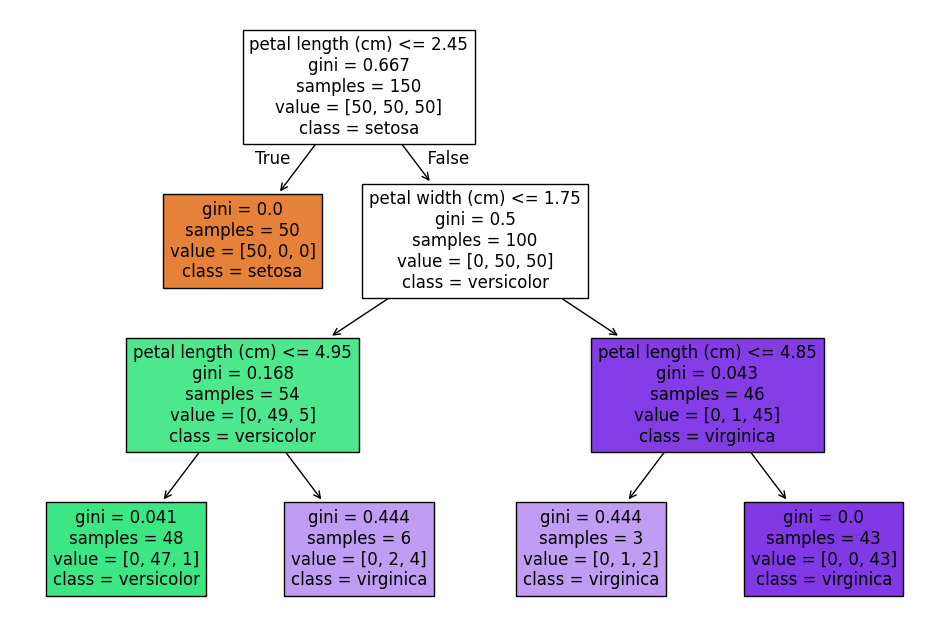

Acurácia do modelo: 0.97


In [24]:


# # Divisão em treino e teste
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar a árvore de decisão
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
# clf.fit(X_train, y_train)
clf.fit(x, y)

# Visualizar a árvore
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Avaliação do modelo
# accuracy = clf.score(X_test, y_test)
accuracy = clf.score(x, y)
print(f"Acurácia do modelo: {accuracy:.2f}")

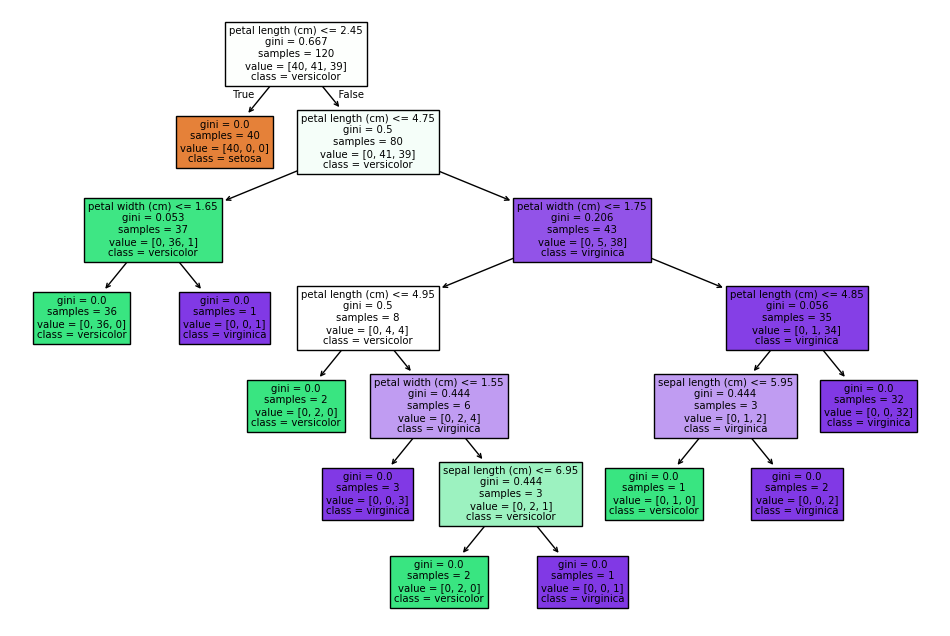

Acurácia do modelo: 1.00


In [25]:


# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Criar e treinar a árvore de decisão
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# clf.fit(x, y)

# Visualizar a árvore
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Avaliação do modelo
accuracy = clf.score(X_test, y_test)
# accuracy = clf.score(x, y)
print(f"Acurácia do modelo: {accuracy:.2f}")

In [32]:
minimos_splits = np.array([2, 3, 4, 5, 6, 7, 8])
maximo_nivel =  np.array([ 3, 4, 5, 6])

algoritmo = ['gini', 'entropy']
valores_grid = {'min_samples_split': minimos_splits, "max_depth": maximo_nivel, "criterion": algoritmo}
modelo = DecisionTreeClassifier()

gridDecisionTree = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=5)
gridDecisionTree.fit(x, y)

print(f"Minimo split{gridDecisionTree.best_estimator_.min_samples_split}")
print(f"Maximo profundidade{gridDecisionTree.best_estimator_.max_depth}")
print(f"Algoritmo escolhido{gridDecisionTree.best_estimator_.criterion}")
print(f"Acuracia{gridDecisionTree.best_score_}")



Minimo split3
Maximo profundidade3
Algoritmo escolhidogini
Acuracia0.9733333333333334


In [35]:
arquivo2 = "/home/marco/projects/machine_learning/exemplo2.dot"
melhor_modelo  = DecisionTreeClassifier(min_samples_split= 3, criterion="gini", max_depth=3)
melhor_modelo.fit(x, y)
export_graphviz(melhor_modelo, out_file=arquivo2, feature_names=iris.feature_names)

with open(arquivo2) as aberto:
    grafico_dot = aberto.read()
h = graphviz.Source(grafico_dot)
h.view()

'Source.gv.pdf'